# FIFA World Cup Data Analysis

![](https://img.fifa.com/image/upload/t_l4/v1543921822/ex1ksdevyxwsgu7rzdv6.jpg)


### Project Overview
The dataset we analyse is FIFA World Cup which have 3 different datasets about Winners, Players and Matches. The datasets are not perfect with lot of duplicated and incorrect data so our job is to clean the datasets to make it usable for meaningful data extraction.

**Please note:** during the data cleaning process, we use the explode() function so please upgrade your pandas to 0.25.0 in order to make this function works.

### The datasets
_For more information about the dataset, read [here](https://www.kaggle.com/abecklas/fifa-world-cup)._

### Our process
1. Project Planning: We spent some time to plan for the story, share the work among team member, brainstom ideas for data analysis and visualisation. Here is our project planning file: [Click to view](https://docs.google.com/spreadsheets/d/1NBCiCejZzTr-538EqCOWW3V6LcT62mLmoYX3RIpIgCc/edit?usp=sharing)
2. Clean the datasets	
3. Do Explanatory Data Analysis on Jupyter Notebook	
4. Do more detailed analysis with data visualization using Google Data Studio	
5. Present It!

### Google Data Studio report
[Please click here to view our report](https://datastudio.google.com/open/1ybUFdJcafz1F46MHy8rC8HQX4-2utHwC)



### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

### Create Data Frames

In [3]:
df_matches_raw = pd.read_csv('./data/matches.csv', encoding='UTF-8')
df_winners_raw = pd.read_csv('./data/winners.csv', encoding='UTF-8')
df_players_raw = pd.read_csv('./data/players.csv', encoding='UTF-8')

# Clean Data
### Please Note
During the data cleaning process, we use the explode() function so please upgrade your pandas to 0.25.0 in order to make this function works.

In [4]:
# Because the Event column store multiple data in one data point, i.e. G5' G20' Y20', 
# we will split the string into multiple data points in order to make it easier to extract more valuable insights
df_players_raw = df_players_raw.assign(Event=df_players_raw["Event"].str.split('\s')).explode('Event').reset_index(drop=True)

# Define helper functions
def get_event_type(row):
  """ Return only the words from Event rows
  """
  event_type = ''
  if pd.notna(row):
    event_type = re.findall(r"[A-Z]+", row)[0]
  return event_type

def get_event_at(row):
  """ Return only the numbers from Event rows
  """
  event_at = ''
  if pd.notna(row):
    event_at = re.findall(r"\d+", row)[0]
  return event_at

# Proceeding the string manipulation
df_players_raw["Event At"] = df_players_raw.apply(lambda x: get_event_at(x['Event']) , axis=1)
df_players_raw["Event"] = df_players_raw.apply(lambda x: get_event_type(x['Event']) , axis=1)

# Rename Event column to Event Type
df_players_raw.rename(columns={'Event': 'Event Type'}, inplace=True)

# Test
df_players_raw[df_players_raw['Event Type'] != ""].sample(2)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event Type,Event At
38943,255951,300186503,SUI,HITZFELD Ottmar (GER),S,10,XHAKA,NaN,Y,36
26667,43950100,43950012,CHN,MILUTINOVIC Bora (YUG),S,5,ZH Y FAN,NaN,O,74


In [5]:
df_matches_raw.tail(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_players_raw.head(2)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event Type,Event At
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,,
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,,


In [7]:
df_winners_raw.head(2)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000


#### Remove NaN

In [8]:
# Remove null rows of Matches dataset
df_matches = df_matches_raw.copy()
df_players = df_players_raw.copy()
df_winners = df_winners_raw.copy()

df_matches = df_matches[(df_matches["RoundID"].isnull() == False) & (df_matches["MatchID"].isnull() == False)]

# Find NaN values from the data points
df_matches.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [9]:
# Get the 2 rows with Attendance is NaN
df_matches[df_matches["Attendance"].isnull()]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
823,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
841,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG


In [10]:
# Clean NaN value
df_matches["Attendance"].fillna(value = 0, inplace = True)
df_matches = df_matches.fillna('')
df_players = df_players.fillna('')
df_winners = df_winners.fillna('')

In [11]:
df_matches.sample(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
475,1994.0,21 Jun 1994 - 19:30,Group D,Cotton Bowl,Dallas,Nigeria,3.0,0.0,Bulgaria,,44132.0,2.0,0.0,BADILLA Rodrigo (CRC),DUNSTER Gordon (AUS),BRAZZALE Eugene (AUS),337.0,3061.0,NGA,BUL
190,1966.0,20 Jul 1966 - 19:30,Group 2,Villa Park,Birmingham,Germany FR,2.0,1.0,Spain,,42187.0,1.0,1.0,MARQUES Armando (BRA),VICUNA Claudio (CHI),CHOI Duk Ryong (PRK),238.0,1637.0,FRG,ESP


In [12]:
# Process Attendance values
df_winners = df_winners_raw.fillna('')
df_winners["Attendance"] = df_winners["Attendance"].str.replace('.', '')
df_winners.head(2)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000


#### Clean Data Point values

In [46]:
df_matches_players[df_matches_players["Player Name"].str.contains("M�LLER")]

,Year,Date,Time,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,...,RoundID_y,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event Type,Event At,Team Name


In [14]:
# Rename Germany FR to Germany
df_winners.replace("Germany FR", "Germany", inplace=True)
df_matches.replace("Germany FR", "Germany", inplace=True)
df_players.replace("Germany FR", "Germany", inplace=True)

# Fix country names
df_matches.replace("IR Iran", "Iran", inplace=True)
df_matches.replace("rn\">Bosnia and Herzegovina", "Bosnia and Herzegovina", inplace=True)
df_matches.replace("rn\">Serbia and Montenegro", "Serbia and Montenegro", inplace=True)
df_matches.replace("rn\">United Arab Emirates", "United Arab Emirates", inplace=True)
df_matches.replace("rn\">Republic of Ireland", "Republic of Ireland", inplace=True)
df_matches.replace("rn\">Trinidad and Tobago", "Trinidad and Tobago", inplace=True)
df_matches.replace("C�te d'Ivoire", "Ivory Coast", inplace=True)
df_matches.replace("Korea DPR", "North Korea", inplace=True)
df_players.replace("Korea DPR", "North Korea", inplace=True)

# Fix some names for Google Data Studio report
df_matches.replace("Maracan� - Est�dio Jornalista M�rio Filho", "Maracana", inplace=True)
df_players.replace("PEL� (Edson Arantes do Nascimento)", "PELE", inplace=True)
df_players.replace("M�LLER", "MULLER", inplace=True)

#### Separate Datetime column

In [15]:
# Separate DateTime column
df_matches.insert(loc = 2, column="Time", value="")
df_matches.head(2)

,Year,Datetime,Time,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,...,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,...,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,...,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [16]:
df_matches.loc[:, 'Time'] = df_matches["Datetime"].apply(lambda x: x.split('-')[1].strip())
df_matches.loc[:, 'Datetime'] = df_matches["Datetime"].apply(lambda x: x.split('-')[0].strip())
df_matches.head(2)

,Year,Datetime,Time,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,...,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930,15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,...,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930,15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,...,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [17]:
# Rename Datetime column
df_matches.rename(columns={'Datetime': 'Date'}, inplace=True)
df_matches.sample(2)

,Year,Date,Time,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,...,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
86,1954.0,19 Jun 1954,17:00,Group 1,La Pontaise,Lausanne,Brazil,1.0,1.0,Yugoslavia,...,24637.0,0.0,0.0,FAULTLESS Charlie (SCO),ELLIS Arthur (ENG),VON GUNTER Albert (SUI),211.0,1252.0,BRA,YUG
198,1966.0,28 Jul 1966,19:30,Match for third place,Wembley Stadium,London,Portugal,2.0,1.0,Soviet Union,...,87696.0,1.0,1.0,DAGNALL Kenneth (ENG),HOWLEY Kevin (ENG),KANDIL Aly Hussein (EGY),3479.0,1709.0,POR,URS


#### Check data duplication

In [18]:
# Check for duplicated data
df_matches["MatchID"].nunique() == df_matches["MatchID"].count()

False

In [19]:
# Find duplicated rows from the dataset
def get_duplicated_data(df, key):
  """
    Return a DataFrame of duplicated data points of a given dataset
  """
  
  df_key = df[key]
  return df[df_key.isin(df_key[df_key.duplicated()])].sort_values(key)
  
get_duplicated_data(df_matches, "MatchID")

,Year,Date,Time,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,...,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
839,2014.0,29 Jun 2014,17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,...,41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE
833,2014.0,29 Jun 2014,17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,...,41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE
841,2014.0,30 Jun 2014,17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,...,0.0,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
823,2014.0,30 Jun 2014,17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,...,0.0,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
824,2014.0,04 Jul 2014,17:00,Quarter-finals,Estadio Castelao,Fortaleza,Brazil,2.0,1.0,Colombia,...,60342.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255953.0,300186461.0,BRA,COL
845,2014.0,04 Jul 2014,17:00,Quarter-finals,Estadio Castelao,Fortaleza,Brazil,2.0,1.0,Colombia,...,60342.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255953.0,300186461.0,BRA,COL
840,2014.0,30 Jun 2014,13:00,Round of 16,Estadio Nacional,Brasilia,France,2.0,0.0,Nigeria,...,67882.0,0.0,0.0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255951.0,300186462.0,FRA,NGA
822,2014.0,30 Jun 2014,13:00,Round of 16,Estadio Nacional,Brasilia,France,2.0,0.0,Nigeria,...,67882.0,0.0,0.0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255951.0,300186462.0,FRA,NGA
826,2014.0,08 Jul 2014,17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,...,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
848,2014.0,08 Jul 2014,17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,...,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER


In [20]:
df_matches.drop_duplicates(keep = 'first', inplace = True)

In [21]:
df_players.drop_duplicates(keep = 'first', inplace = True)

In [22]:
# Check for duplicated data again
df_matches["MatchID"].nunique() == df_matches["MatchID"].count()

True

#### Feature Engineering

In [23]:
# Create a dictionary of Team Name in order to incorporate it to the Players dataset
country_dict = {'FRA':'France', 'MEX': 'Mexico', 'USA':'USA', 'BEL':'Belgium', 'YUG':'Yugoslavia', 'BRA':'Brazil', 'ROU':'Romania', 
                'PER':'Peru', 'ARG':'Argentina', 'CHI':'Chile', 'BOL':'Bolivia', 'PAR':'Paraguay', 'URU':'Burundi', 'AUT':'Austria', 'HUN':'Hungary', 
                'EGY':'Egypt', 'SUI':'Switzerland', 'NED':'Netherlands', 'SWE':'Sweden', 'GER':'Germany', 'ESP':'Spain', 'ITA':'Italy', 'TCH':'Czechoslovakia', 'INH':'Dutch East Indies', 
                'CUB':'Cuba', 'NOR':'Norway', 'POL':'Poland', 'FRG':'Germany', 'GDR' : 'German DR',
                'ENG':'England', 'SCO':'Scotland', 'TUR':'Turkey', 'KOR':'Korea Republic', 'URS':'Soviet Union', 'WAL':'Wales', 'NIR':'Northern Ireland', 'COL':'Colombia', 
                'BUL':'Bulgaria', 'PRK':'North Korea', 'POR':'Portugal', 'ISR':'Israel', 'MAR':'Morocco', 'SLV':'El Salvador', 'AUS':'Australia', 'ZAI':'Zaire', 
                'HAI':'Haiti', 'TUN':'Tunisia', 'IRN':'IR Iran', 'CMR':'Cameroon', 'NZL':'New Zealand', 'ALG':'Algeria', 'HON':'Honduras', 'KUW':'Kuwait', 'CAN':'Canada', 
                'IRQ':'Iraq', 'DEN':'Denmark', 'UAE':'United Arab Emirates', 'CRC':'Costa Rica', 'IRL':'Republic of Ireland', 'KSA':'Saudi Arabia', 'RUS':'Russia', 'GRE':'Greece', 'NGA':'Nigeria', 
                'RSA':'South Africa', 'JPN':'Japan', 'JAM':'Jamaica', 'CRO':'Croatia', 'SEN':'Senegal', 'SVN':'Slovenia', 'ECU':'Ecuador', 'CHN':'China PR', 'TRI':'Trinidad and Tobago',
                'CIV':'Ivory Coast', 'SCG':'Serbia and Montenegro', 'ANG':'Angola', 'CZE':'Czech Republic', 'GHA':'Ghana', 'TOG':'Togo', 'UKR':'Ukraine', 'SRB':'Serbia', 'SVK':'Slovakia', 'BIH':'Bosnia and Herzegovina'}

# Input a player name and return the country name
def get_country_name_from_player(df, player_name):
  initials = df[df["Player Name"] == player_name]['Team Initials'].unique()[0]
  
  return country_dict[initials]

def get_country_name_by_initials(initials):
  return country_dict[initials]

In [24]:
# Add one column to store the Team Name (Country Name) in Players dataset
df_players["Team Name"] = df_players["Team Initials"].apply(lambda x: get_country_name_by_initials(x))

#### Convert Data Types

In [25]:
# Convert data type of Players dataset
df_players["Team Initials"] = df_players["Team Initials"].astype("category")
df_players["Coach Name"] = df_players["Coach Name"].astype("category")
df_players["Line-up"] = df_players["Line-up"].astype("category")
df_players["Player Name"] = df_players["Player Name"].astype("category")
df_players["Position"] = df_players["Position"].astype("category")
df_players["Event Type"] = df_players["Event Type"].astype("category")
df_players["Event At"] = df_players["Event At"].astype("category")
df_players["Team Name"] = df_players["Team Name"].astype("category")
df_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38646 entries, 0 to 38645
Data columns (total 11 columns):
RoundID          38646 non-null int64
MatchID          38646 non-null int64
Team Initials    38646 non-null category
Coach Name       38646 non-null category
Line-up          38646 non-null category
Shirt Number     38646 non-null int64
Player Name      38646 non-null category
Position         38646 non-null category
Event Type       38646 non-null category
Event At         38646 non-null category
Team Name        38646 non-null category
dtypes: category(8), int64(3)
memory usage: 1.9 MB


In [26]:
# Convert data type of Winners dataset
df_winners["Country"] = df_winners["Country"].astype("category")
df_winners["Winner"] = df_winners["Winner"].astype("category")
df_winners["Runners-Up"] = df_winners["Runners-Up"].astype("category")
df_winners["Third"] = df_winners["Third"].astype("category")
df_winners["Fourth"] = df_winners["Fourth"].astype("category")
df_winners["Attendance"] = df_winners["Attendance"].astype("int")
df_winners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
Year              20 non-null int64
Country           20 non-null category
Winner            20 non-null category
Runners-Up        20 non-null category
Third             20 non-null category
Fourth            20 non-null category
GoalsScored       20 non-null int64
QualifiedTeams    20 non-null int64
MatchesPlayed     20 non-null int64
Attendance        20 non-null int64
dtypes: category(5), int64(5)
memory usage: 4.0 KB


In [27]:
# Convert data type of Matches dataset
df_matches["Year"] = df_matches["Year"].astype("category")
df_matches["Date"] = df_matches["Date"].astype("category")
df_matches["Time"] = df_matches["Time"].astype("category")
# df_matches["Datetime"] = df_matches["Datetime"].astype("category")
df_matches["Stage"] = df_matches["Stage"].astype("category")
df_matches["Stadium"] = df_matches["Stadium"].astype("category")
df_matches["City"] = df_matches["City"].astype("category")
df_matches["Home Team Name"] = df_matches["Home Team Name"].astype("category")
df_matches["Home Team Goals"] = df_matches["Home Team Goals"].astype("int")
df_matches["Away Team Goals"] = df_matches["Away Team Goals"].astype("int")
df_matches["Away Team Name"] = df_matches["Away Team Name"].astype("category")
df_matches["Win conditions"] = df_matches["Win conditions"].astype("category")
df_matches["Attendance"] = df_matches["Attendance"].astype("int")
df_matches["Half-time Home Goals"] = df_matches["Half-time Home Goals"].astype("int")
df_matches["Half-time Away Goals"] = df_matches["Half-time Away Goals"].astype("int")
df_matches["Referee"] = df_matches["Referee"].astype("category")
df_matches["Assistant 1"] = df_matches["Assistant 1"].astype("category")
df_matches["Assistant 2"] = df_matches["Assistant 2"].astype("category")
df_matches["RoundID"] = df_matches["RoundID"].astype("int")
df_matches["MatchID"] = df_matches["MatchID"].astype("int")
df_matches["Home Team Initials"] = df_matches["Home Team Initials"].astype("category")
df_matches["Away Team Initials"] = df_matches["Away Team Initials"].astype("category")
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 835
Data columns (total 21 columns):
Year                    836 non-null category
Date                    836 non-null category
Time                    836 non-null category
Stage                   836 non-null category
Stadium                 836 non-null category
City                    836 non-null category
Home Team Name          836 non-null category
Home Team Goals         836 non-null int64
Away Team Goals         836 non-null int64
Away Team Name          836 non-null category
Win conditions          836 non-null category
Attendance              836 non-null int64
Half-time Home Goals    836 non-null int64
Half-time Away Goals    836 non-null int64
Referee                 836 non-null category
Assistant 1             836 non-null category
Assistant 2             836 non-null category
RoundID                 836 non-null int64
MatchID                 836 non-null int64
Home Team Initials      836 non-null categ

In [28]:
# df_matches_players = df_matches.copy()
# df_matches_players.merge(df_players, left_on="MatchID", right_on="MatchID")
# Merge Players and Matches datasets
df_matches_players = pd.merge(df_matches, df_players, how='outer', on="MatchID")

df_matches_players[df_matches_players['Player Name'] == 'Alex THEPOT']

,Year,Date,Time,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,...,RoundID_y,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event Type,Event At,Team Name
0,1930.0,13 Jul 1930,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,...,201,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,,,France
146,1930.0,15 Jul 1930,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,...,201,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,,,France
341,1930.0,19 Jul 1930,12:50,Group 1,Estadio Centenario,Montevideo,Chile,1,0,France,...,201,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,,,France
705,1934.0,27 May 1934,16:30,Preliminary round,Stadio Benito Mussolini,Turin,Austria,3,2,France,...,204,FRA,KIMPTON George (ENG),S,0,Alex THEPOT,GKC,,,France


In [29]:
# Convert data type
df_matches_players["Year"] = df_matches_players["Year"].astype("category")
df_matches_players["Date"] = df_matches_players["Date"].astype("category")
df_matches_players["Time"] = df_matches_players["Time"].astype("category")
df_matches_players["Stage"] = df_matches_players["Stage"].astype("category")
df_matches_players["Stadium"] = df_matches_players["Stadium"].astype("category")
df_matches_players["City"] = df_matches_players["City"].astype("category")
df_matches_players["Home Team Name"] = df_matches_players["Home Team Name"].astype("category")
df_matches_players["Home Team Goals"] = df_matches_players["Home Team Goals"].astype("int")
df_matches_players["Away Team Goals"] = df_matches_players["Away Team Goals"].astype("int")
df_matches_players["Away Team Name"] = df_matches_players["Away Team Name"].astype("category")
df_matches_players["Win conditions"] = df_matches_players["Win conditions"].astype("category")
df_matches_players["Attendance"] = df_matches_players["Attendance"].astype("int")
df_matches_players["Half-time Home Goals"] = df_matches_players["Half-time Home Goals"].astype("int")
df_matches_players["Half-time Away Goals"] = df_matches_players["Half-time Away Goals"].astype("int")
df_matches_players["Referee"] = df_matches_players["Referee"].astype("category")
df_matches_players["Assistant 1"] = df_matches_players["Assistant 1"].astype("category")
df_matches_players["Assistant 2"] = df_matches_players["Assistant 2"].astype("category")
df_matches_players["RoundID_x"] = df_matches_players["RoundID_x"].astype("int")
df_matches_players["RoundID_y"] = df_matches_players["RoundID_y"].astype("int")
df_matches_players["MatchID"] = df_matches_players["MatchID"].astype("int")
df_matches_players["Home Team Initials"] = df_matches_players["Home Team Initials"].astype("category")
df_matches_players["Away Team Initials"] = df_matches_players["Away Team Initials"].astype("category")
df_matches_players["Event Type"] = df_matches_players["Event Type"].astype("category")
df_matches_players["Event At"] = df_matches_players["Event At"].astype("category")
df_matches_players["Team Name"] = df_matches_players["Team Name"].astype("category")
df_matches_players["Team Initials"] = df_matches_players["Team Initials"].astype("category")
df_matches_players["Coach Name"] = df_matches_players["Coach Name"].astype("category")
df_matches_players["Line-up"] = df_matches_players["Line-up"].astype("category")
df_matches_players["Player Name"] = df_matches_players["Player Name"].astype("category")
df_matches_players["Position"] = df_matches_players["Position"].astype("category")

df_matches_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38646 entries, 0 to 38645
Data columns (total 31 columns):
Year                    38646 non-null category
Date                    38646 non-null category
Time                    38646 non-null category
Stage                   38646 non-null category
Stadium                 38646 non-null category
City                    38646 non-null category
Home Team Name          38646 non-null category
Home Team Goals         38646 non-null int64
Away Team Goals         38646 non-null int64
Away Team Name          38646 non-null category
Win conditions          38646 non-null category
Attendance              38646 non-null int64
Half-time Home Goals    38646 non-null int64
Half-time Away Goals    38646 non-null int64
Referee                 38646 non-null category
Assistant 1             38646 non-null category
Assistant 2             38646 non-null category
RoundID_x               38646 non-null int64
MatchID                 38646 non-null int64


#### Write the cleaned datasets to files

In [30]:
df_winners.to_csv('./data/winners_cleaned.csv', index = False)
df_matches.to_csv('./data/matches_cleaned.csv', index = False)
df_players.to_csv('./data/players_cleaned.csv', index = False)
df_matches_players.to_csv('./data/matches_players_cleaned.csv', index = False)

# EDA

### Creating the Data frame for 2018 and Merging with the Winners list

In [31]:
winner_2018 = [2018, 'Russia', 'France', 'Croatia', 'Belgium', 'England', 169, 32, 64, 3031768]
d = {df_winners.columns[i]:winner_2018[i] for i in range(len(winner_2018))}
df_updated_winners = df_winners.append(d, ignore_index=True)
df_updated_winners.tail()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2705197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3359439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3178856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3386810
20,2018,Russia,France,Croatia,Belgium,England,169,32,64,3031768


### Positive Corelation for Attendance Vs Year

<Figure size 720x432 with 0 Axes>

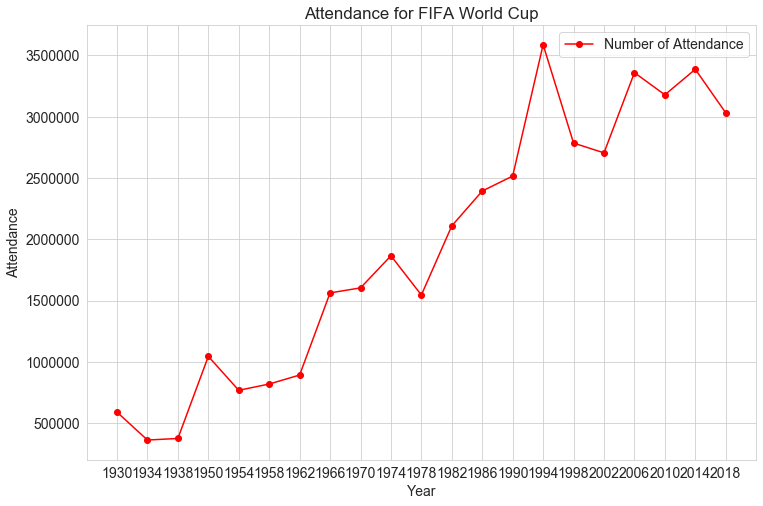

In [32]:
# Config matplotlib default font style
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

Attendances = df_updated_winners['Attendance'].tolist()
Year = [str(x) for x in df_updated_winners['Year'].tolist()]
plt.figure(figsize=(10,6))

fig, ax = plt.subplots(1, 1, figsize = [12, 8])
t = np.arange(1930, 2030, 10)
ax.plot(Year, Attendances, 'ro-', label = 'Number of Attendance')
# plt.xticks(t)
ax.set_xlabel('Year')
ax.set_ylabel('Attendance')
ax.set_xticks(Year)
plt.legend(loc='best', ncol=2)
ax.set_title('Attendance for FIFA World Cup')
plt.show()


### Top Countries which won the World Cup

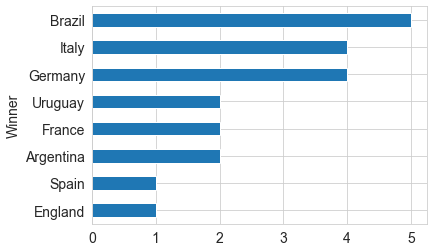

In [33]:
Winner_Max = df_updated_winners.groupby('Winner').count()

Winner_Max.sort_values('Year', ascending = True)['Year'].plot(kind='barh')

### Top Countries which won the Runners-Up prize

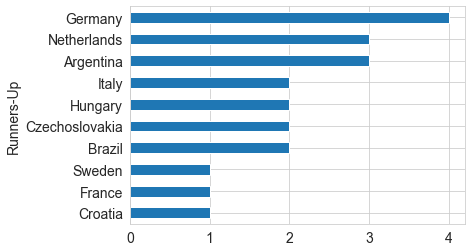

In [34]:
Runnersup_Max = df_updated_winners.groupby('Runners-Up').count()

Runnersup_Max.sort_values('Year', ascending = True)['Year'].plot(kind='barh')

### Number of Times the Country hosted the FIFA World Cup

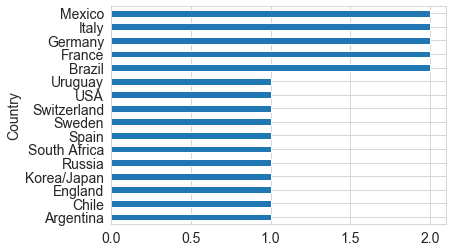

In [35]:
Hosting_country = df_updated_winners.groupby('Country').count()
Hosting_country.sort_values('Year', ascending = True)['Year'].plot(kind='barh')

### Number of Attendance by Year

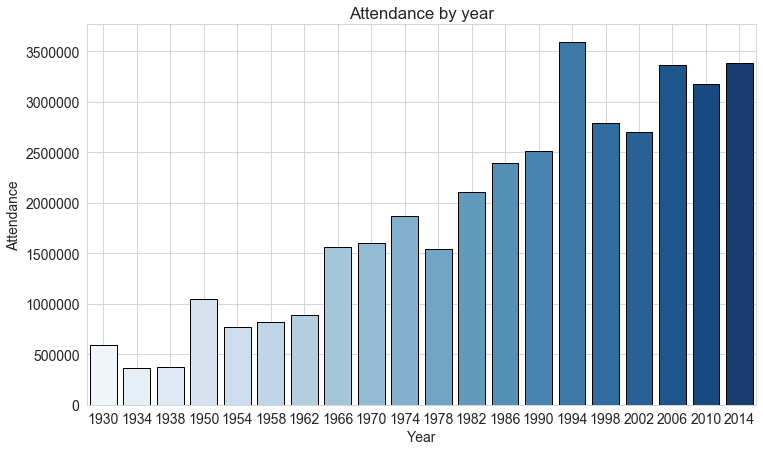

In [36]:
plt.figure(figsize=(12,7))
sns.barplot(df_winners["Year"],df_winners["Attendance"],linewidth=1,edgecolor="k"*len(df_winners), palette="Blues")
plt.grid(True)
plt.title("Attendance by year")
plt.show()

### HeatMap for the Winners List

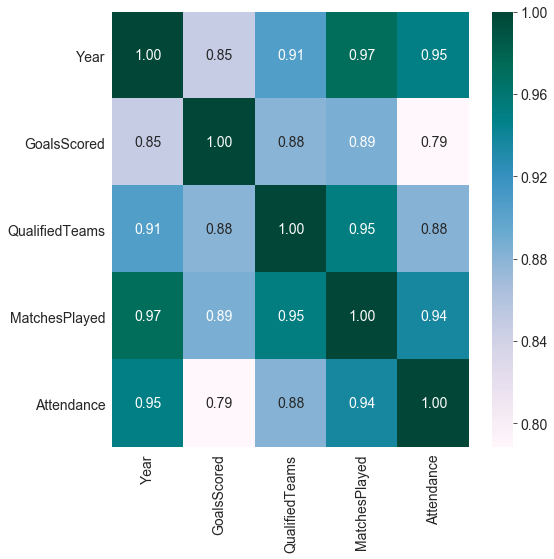

In [37]:
plt.figure(figsize=(8,8))
sns.heatmap(df_updated_winners.corr(), annot=True, fmt='.2f', cmap='PuBuGn')

### The data includes Nationality and Name
We will split the column into Nationality and Name

In [38]:
# Split referee column to "Referee Name" and "Referee Nationality"
df_matches['Referee Name'] = df_matches['Referee'].str.split('\s+\(').str[0]
df_matches['Referee Nationality'] = df_matches['Referee'].str.split('\s+\(').str[1].replace('^)','')
# remove special character in Referee Nationality
df_matches['Referee Nationality'] = df_matches['Referee Nationality'].str.replace('\W', '')

# The Referee Name are all upper or lower cases, let's capitalized only the first letter
df_matches['Referee Name'] = df_matches['Referee Name'].str.title()

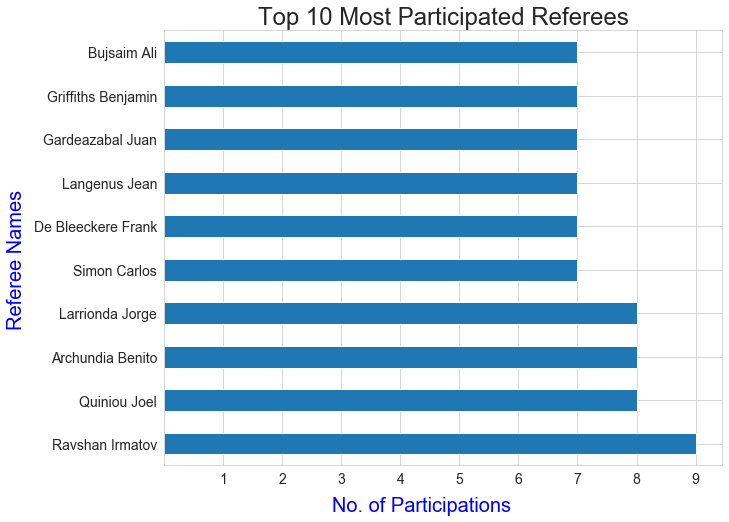

In [39]:
# Plot Top 10 Most participated referees

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xticks(range(1, 11))
ax.tick_params(axis='both', which='major')
ax.set_title('Top 10 Most Participated Referees', fontsize = 24)
ax.annotate('No. of Participations', xy=(0.3, -0.07) ,ha='left', va='top', xycoords='axes fraction', fontsize=20, color = 'b')
ax.annotate('Referee Names', xy=(-0.24, 0.6), xytext=(-23,15), ha='left', va='top', xycoords='axes fraction', 
            textcoords='offset points', fontsize=20, color = 'b', rotation = 90)
pd.value_counts(df_matches['Referee Name']).head(10).plot.barh()

#### Conclusion: Raveshan Irmatove is the most popular referee in all World Cup seasons up to 2014

### How many matches had been won over a conditions?

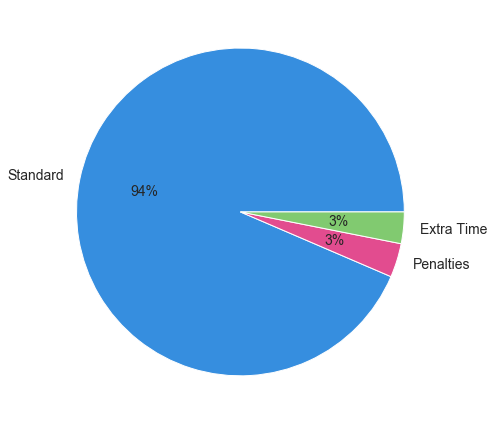

In [40]:
# df_matches = df_matches["Win conditions"].str.split('\swin\s', expand = True)
df_matches['Winner'] = df_matches['Win conditions'].str.split('win').str[0]
df_matches['Conditions'] = df_matches['Win conditions'].str.split('win').str[1]
                        
df_matches['Conditions'] = df_matches['Conditions'].fillna('')
df_matches

# What are percentages of winning over conditions matches
df_matches.loc[df_matches['Conditions'].str.contains('pen') == True, 'Conditions'] = 'Penalties'

labels = ['Standard', 'Penalties', 'Extra Time']
colors = ['#368edf','#e24c8f','#81ca70']

fig, ax = plt.subplots(figsize=(7, 7))
patches, texts, autotexts = ax.pie(pd.value_counts(df_matches['Conditions']), labels=labels, colors=colors, autopct='%1.0f%%')

for text in texts:
  text.set_fontsize(14)
  
for autotext in autotexts:
  autotext.set_fontsize(14)
  
plt.tight_layout()
plt.show()

#### So there are 6% of matches won over conditions (Penalties and Extra Time). And the percentages is divided equally to both Penalties and Extra Time.

### Fun fact: worst time to play football
We discover that there are 122 entries with Yellow card drawn at 01:00, such a weird data but funny to get some insight!

In [41]:
df_worst_time = df_matches_players[(df_matches_players["Event Type"] == "Y") & (df_matches_players["Event At"] == "1")][["Time", "Event Type", "Event At"]].reset_index()
df_worst_time["Time"] = df_worst_time["Time"].astype("object")

df_worst_time = df_worst_time[df_worst_time["Time"] != "0"]["Time"].value_counts()
df_worst_time

16:00    33
19:30    24
12:00    15
15:00    13
16:45    10
13:45     9
19:15     7
21:00     5
18:00     3
17:15     3
Name: Time, dtype: int64

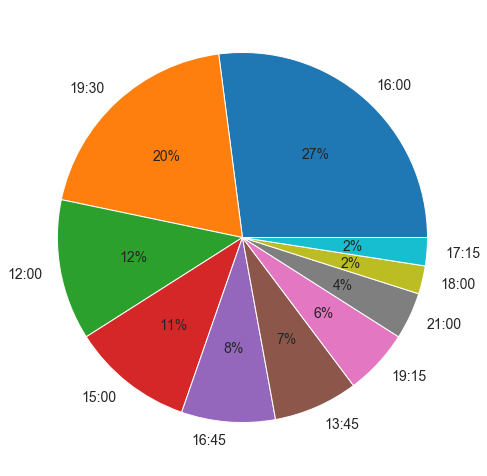

In [42]:
labels = df_worst_time.index
colors = ['#368edf','#e24c8f','#81ca70']

fig, ax = plt.subplots(figsize=(7, 7))
patches, texts, autotexts = ax.pie(df_worst_time.values, labels=labels, autopct='%1.0f%%')

for text in texts:
  text.set_fontsize(14)
  
for autotext in autotexts:
  autotext.set_fontsize(14)
  
plt.tight_layout()
plt.show()

**Conclusion: The worst time to play football are 16:00 and 19:30 because they have the most yellow cards drawn at 01:00**

### Fun fact: luckiest time to play football
We also discover that there are 12 entries with Goals Scored at 01:00, let find something useful from it!

In [43]:
df_luckiest_time = df_matches_players[(df_matches_players["Event Type"] == "G") & (df_matches_players["Event At"] == "1")][["Time", "Event Type", "Event At"]].reset_index()
df_luckiest_time["Time"] = df_luckiest_time["Time"].astype("object")

df_luckiest_time = df_luckiest_time[df_luckiest_time["Time"] != "0"]["Time"].value_counts()
df_luckiest_time

15:00    3
18:00    2
17:00    1
19:00    1
14:50    1
13:45    1
21:00    1
17:15    1
20:00    1
Name: Time, dtype: int64

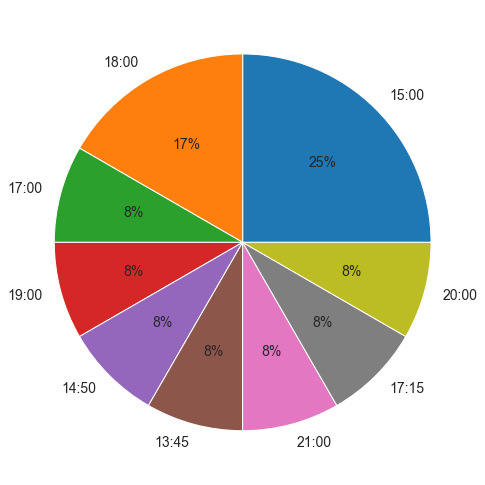

In [44]:
labels = df_luckiest_time.index
colors = ['#368edf','#e24c8f','#81ca70']

fig, ax = plt.subplots(figsize=(7, 7))
patches, texts, autotexts = ax.pie(df_luckiest_time.values, labels=labels, autopct='%1.0f%%')

for text in texts:
  text.set_fontsize(14)
  
for autotext in autotexts:
  autotext.set_fontsize(14)
  
plt.tight_layout()
plt.show()

**Conclusion: The worst time to play football are 15:00 and 18:30 because they have the most goals scored at 01:00**